In [220]:
from nltk.stem.porter import *
import os
import torchfile
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

stemmer = PorterStemmer()

In [271]:
def grepLinesAndPos(term):
    stemTerm = stemmer.stem(term.decode('utf8'))
    res = []
    for idx, line in enumerate(en):
        for pos, token in enumerate(line.split()):
#             if term == token:
            if stemTerm == stemmer.stem(token.decode('utf8')):
                res.append((idx, pos))
                break
    return res  

In [272]:
def getFeatures(term, command):
    lineAndPos = grepLinesAndPos(term)
    writer = open(tmpInputName,'w')
    for ele in lineAndPos:
        writer.write(en[ele[0]])
    writer.close()
    os.system(command)
    tensors = torchfile.load(tmpOutputName)
    features = []
    for idx, ele in enumerate(lineAndPos):
        assert(tensors[idx].shape[0] == len(en[ele[0]].split()))
        assert(stemmer.stem(term) == stemmer.stem(en[ele[0]].split()[ele[1]]))
        features.append(tensors[idx][ele[1]])
    return np.array(features), lineAndPos

In [273]:
def plot(features, lineId):
    model = TSNE(n_components=2, random_state=0)
    features2D = model.fit_transform(features)
#     print (features2D)
    indices = range(features.shape[0])
    xvals = features2D[indices, 0] 
    yvals = features2D[indices, 1]
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax.plot(xvals, yvals, marker='', linestyle='')
        
    colors = ['black' for i in range(len(lineId))]
    for idx, x, y, color in zip(lineId, xvals, yvals, colors):
        ax.annotate(idx, (x, y), fontsize=8, color=color)
    plt.show()
    

In [274]:
en_path = 'wmt_en_de/newstestAll.en'
de_path = 'wmt_en_de/newstestAll.de'
en = open(en_path, 'r').readlines()
de = open(de_path, 'r').readlines()

tmpInputName = 'input_tmp.txt'
tmpOutputName = 'output_tmp.t7'

model_baseline_path = './models/model_baseline_ende/model_epoch12_7.20.t7'
model_rnn_biencoder_path = './models/model_rnn_biencoder_ende/model_epoch11_6.88.t7'

In [275]:
command_baseline = 'th translate.lua -model ' + model_baseline_path + \
                   ' -src ' + tmpInputName + \
                   ' -output ' + tmpOutputName + \
                   ' -batch_size 1 -gpuid 1 -extract_embedding'
command_rnn_biencoder = 'th translate.lua -model ' + model_rnn_biencoder_path + \
                        ' -src ' + tmpInputName + \
                        ' -output ' + tmpOutputName + \
                        ' -batch_size 1 -gpuid 1 -extract_embedding ' + \
                        ' -concat -gating_type contextBiEncoder'

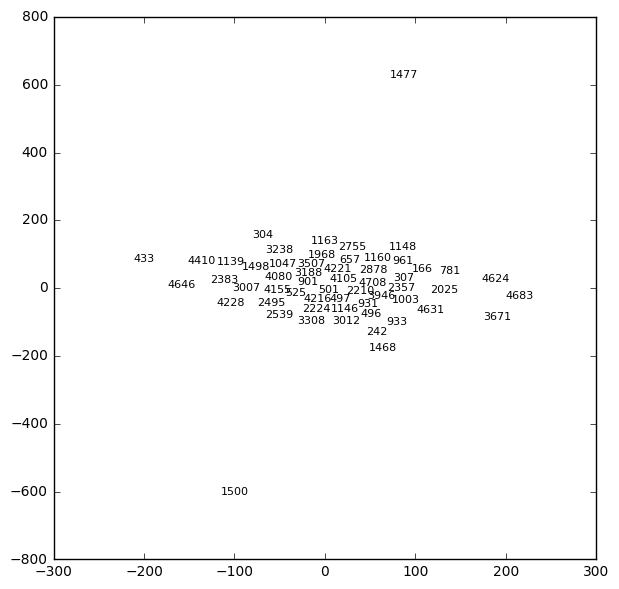

In [288]:
term = 'second'

# features_baseline, lineAndPos_baseline = getFeatures(term, command_baseline)
features_rnn_biencoder, lineAndPos_rnn_biencoder = getFeatures(term, command_rnn_biencoder)
# lineId_baseline = [x[0] for x in lineAndPos_baseline]
lineId_rnn_biencoder = [x[0] for x in lineAndPos_rnn_biencoder]

plot(features_rnn_biencoder, lineId_rnn_biencoder)

In [289]:
for id in lineId_rnn_biencoder:
    print (str(id)+': '+en[id])

166: The US National Intelligence Estimate in February named France alongside Russia and Israel in a second tier of offenders who engage in hacking for economic intelligence , behind China , according to The Washington Post .

242: Mr Mazanga says Mr Guebuza - who is due to step down when his second term ends next year - wants to destroy the country &apos;s democracy .

304: Managing director Graham Turner said Flight Centre had made 8 per cent profit in the first half and had started the second half strongly especially in Australian and UK non ##AT##-##AT##  business travel .

307: In Australia the leisure business rebounded during the second half which offset a slightly weaker domestic corporate travel market .

433: The second person had to be carried .

496: It &apos;s this second job , he said , that funds about 60 % of his nonprofit ; the rest is covered by private donations .

497: &quot; I &apos;m not sure when he sleeps , &quot; said Katie O &apos;Malley , a second ##AT##-##AT